In [35]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import datetime as dt
from sklearn.preprocessing import LabelEncoder

In [40]:
df = pd.read_csv(r'C:/Users/manju/Downloads/coding_challenge.csv')
df.head()

,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,snow,hail,thunder
0,2006-01-24,725300,33.200001,26.799999,1008.500000,7.0,15.2,23.000000,0.0,1.20,False,False,False,False
1,2006-01-25,725300,33.299999,21.400000,1021.099976,10.0,14.0,28.900000,0.0,1.20,False,False,False,False
2,2006-01-26,725300,30.299999,19.700001,1031.400024,9.9,4.6,19.400000,0.0,2.66,False,False,False,False
3,2006-01-27,725300,39.900002,25.299999,1027.599976,10.0,10.7,35.599998,0.0,2.66,False,False,False,False
4,2006-01-28,725300,43.200001,33.799999,1019.900024,9.4,6.6,35.099998,0.0,2.66,False,False,False,False


In [41]:

date_15_years_ago = str(dt.datetime.today() - dt.timedelta(days=15*365)).split(' ')[0]

In [42]:
# Check for missing values
print(df.isnull().sum())


date                      0
station_number            0
mean_temp                 0
mean_dew_point            0
mean_sealevel_pressure    0
mean_visibility           0
mean_wind_speed           0
max_temperature           0
total_precipitation       0
snow_depth                0
fog                       0
snow                      0
hail                      0
thunder                   0
dtype: int64


In [56]:

#Get date which is 15 years ago and exclude it from dataset
df_filtered_date = df[df['date'] != date_15_years_ago].copy()
# Display the filtered data
print("Filtered Data with date 15 years ago:")
print(df_filtered_date)

Filtered Data with date 15 years ago:
             date  station_number  mean_temp  mean_dew_point  \
0      2006-01-24          725300  33.200001       26.799999   
1      2006-01-25          725300  33.299999       21.400000   
2      2006-01-26          725300  30.299999       19.700001   
3      2006-01-27          725300  39.900002       25.299999   
4      2006-01-28          725300  43.200001       33.799999   
...           ...             ...        ...             ...   
15327  2010-04-12          725316  62.099998       45.200001   
15328  2010-04-13          725316  65.900002       44.500000   
15329  2010-04-14          725316  67.199997       46.299999   
15330  2010-04-15          725316  70.500000       46.599998   
15331  2010-04-16          725316  67.099998       52.099998   

       mean_sealevel_pressure  mean_visibility  mean_wind_speed  \
0                 1008.500000              7.0             15.2   
1                 1021.099976             10.0             

In [57]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to boolean columns
boolean_columns = [ 'fog', 'snow', 'hail', 'thunder']
for col in boolean_columns:
    df_filtered_date[col] = le.fit_transform(df_filtered_date[col])

print("\nDataFrame after label encoding boolean columns:")


DataFrame after label encoding boolean columns:


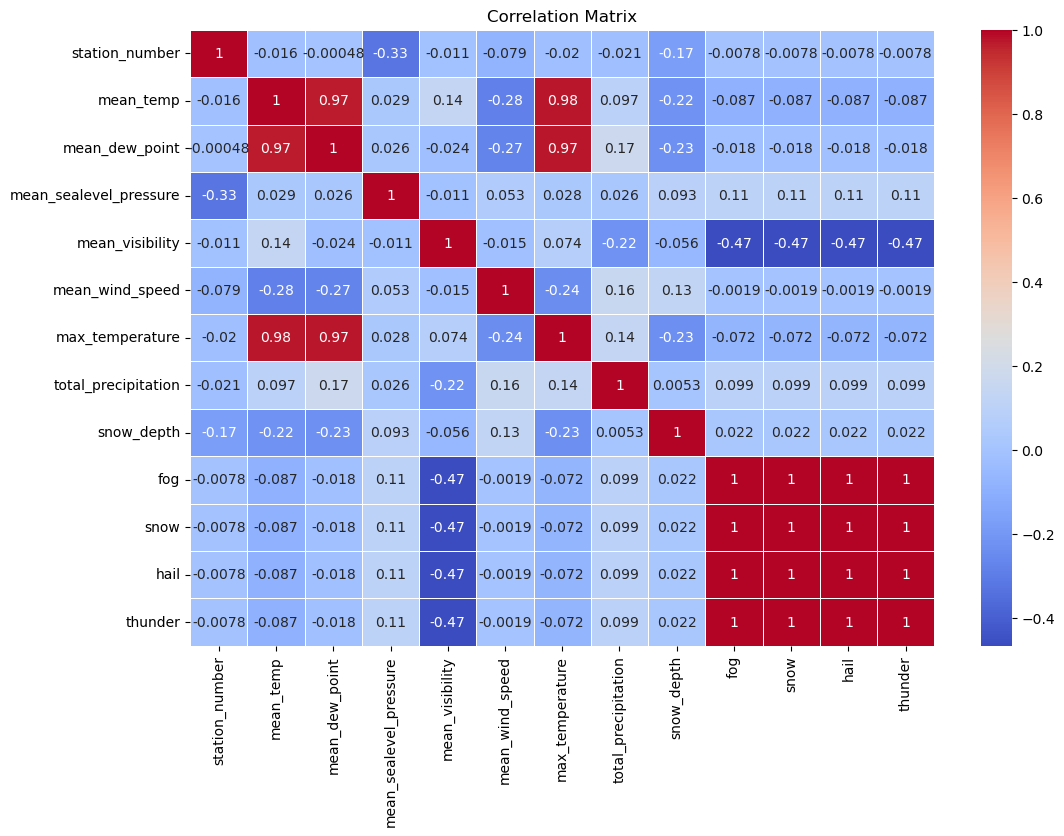

In [58]:
#corerelation matrix for relation between features
df_wodate = df_filtered_date.drop(columns=['date'])
plt.figure(figsize=(12, 8))
corr_matrix = df_wodate.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [59]:
date_15_years_ago

'2009-07-15'

In [60]:
correlation_with_target = df_wodate.corr()['snow'].sort_values(ascending=False)
print("Correlation with snow:\n", correlation_with_target)

Correlation with snow:
 fog                       1.000000
snow                      1.000000
hail                      1.000000
thunder                   1.000000
mean_sealevel_pressure    0.105098
total_precipitation       0.099333
snow_depth                0.021928
mean_wind_speed          -0.001925
station_number           -0.007787
mean_dew_point           -0.018072
max_temperature          -0.072240
mean_temp                -0.087140
mean_visibility          -0.465947
Name: snow, dtype: float64


In [63]:
# Set threshold
target_corr_threshold = 0.1

# Filter features based on threshold
relevant_features = correlation_with_target[correlation_with_target >= target_corr_threshold].index.tolist()
print(relevant_features)

['fog', 'snow', 'hail', 'thunder', 'mean_sealevel_pressure']


In [73]:
# Prepare the filtered DataFrame
X = df_filtered_date[relevant_features]
y = df_filtered_date['snow']

In [74]:

# Split the data into training (70%), evaluation (15%), and test sets (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [75]:
# Train a RandomForest model on the training set
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
# Evaluate the model on the evaluation set
y_eval_pred = model.predict(X_eval)
print("Evaluation Set Accuracy:", accuracy_score(y_eval, y_eval_pred))
print("Evaluation Set Classification Report:\n", classification_report(y_eval, y_eval_pred))


Evaluation Set Accuracy: 1.0
Evaluation Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2088
           1       1.00      1.00      1.00       210

    accuracy                           1.00      2298
   macro avg       1.00      1.00      1.00      2298
weighted avg       1.00      1.00      1.00      2298



In [77]:
# Test the model on the test set
y_test_pred = model.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Set Classification Report:\n", classification_report(y_test, y_test_pred))


Test Set Accuracy: 1.0
Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2073
           1       1.00      1.00      1.00       226

    accuracy                           1.00      2299
   macro avg       1.00      1.00      1.00      2299
weighted avg       1.00      1.00      1.00      2299



In [78]:
forecast_data = df_filtered[df_filtered['date'] == date_15_years_ago].copy()
forecast_data_predict = forecast_data[relevant_features]
forecast_data_predict

,fog,snow,hail,thunder,mean_sealevel_pressure


In [79]:
# Generate features for the forecast date
forecast_date = date_15_years_ago


# Generate a single-row DataFrame for the forecast date
forecast_df = pd.DataFrame({
    'fog': [0],  # Example station number (replace with appropriate station)
    'snow': [0],
    'hail': [0],
    'thunder': [0],
    'mean_sealevel_pressure': [0]  # Example value (replace with appropriate value)
})

In [80]:
forecast_snow = model.predict(forecast_df)

In [81]:
forecast_snow

array([0], dtype=int64)